In [1]:
import pandas as pd  #For data manipulation and analysis
import numpy as np  #For numerical operations
import matplotlib.pyplot as plt #For visualization
%matplotlib inline
import seaborn as sns

import category_encoders as ce                         #For target encoding
from sklearn.model_selection import train_test_split   #For splitting the data into train and test sets 
from sklearn.preprocessing import StandardScaler     #For scaling numerical features

# For Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [3]:
filepath = r"C:\Users\Special User\Downloads\Financial_inclusion_dataset.csv"
df = pd.read_csv(filepath)


In [4]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


The dataset has 23,524 rows and 13 columns
All columns have 23,524 non-null values, so there are no missing values
There are 3 numeric columns (year, household_size, age_of_respondent).
The rest are categorical columns (object type)


In [6]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
df.describe(include ='object')

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [9]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [10]:
duplicate = df.duplicated()
duplicate

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [11]:
numeric_cols = ['household_size', 'age_of_respondent']

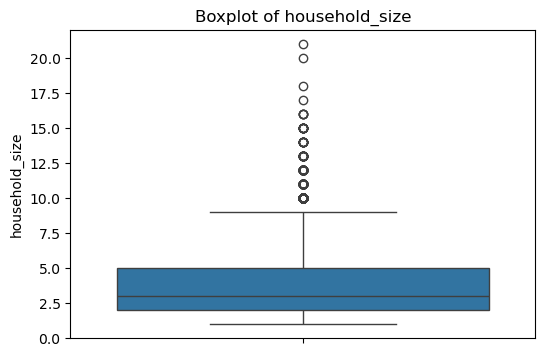

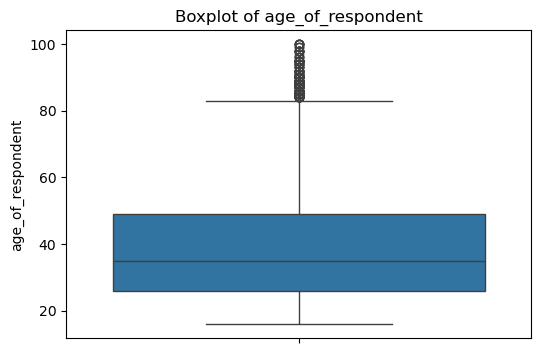

In [12]:
numeric_cols = ['household_size', 'age_of_respondent']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [13]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: Number of outliers = {len(outliers)}")

household_size: Number of outliers = 381
age_of_respondent: Number of outliers = 241


In [14]:
# Check skewness for numeric columns
skewness = df[numeric_cols].skew()
print(skewness)


household_size       0.988200
age_of_respondent    0.841686
dtype: float64


In [15]:
# List of categorical columns
categorical_columns = [
    'country', 'bank_account', 'location_type', 'cellphone_access',
    'gender_of_respondent', 'relationship_with_head', 'marital_status',
    'education_level', 'job_type'
]

# Display unique values and their counts
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n" + "="*50 + "\n")


Column: country
country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64


Column: bank_account
bank_account
No     20212
Yes     3312
Name: count, dtype: int64


Column: location_type
location_type
Rural    14343
Urban     9181
Name: count, dtype: int64


Column: cellphone_access
cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64


Column: gender_of_respondent
gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64


Column: relationship_with_head
relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64


Column: marital_status
marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64


Colum

In [16]:
# Encode the target variable
df['bank_account_encoded'] = df['bank_account'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns
numerical_columns = ['household_size', 'age_of_respondent']

# Calculate correlations
correlations = df[numerical_columns + ['bank_account_encoded']].corr()

# Display correlation with the target variable
print("Correlation with the target variable (bank_account):")
print(correlations['bank_account_encoded'].drop('bank_account_encoded'))


Correlation with the target variable (bank_account):
household_size      -0.028326
age_of_respondent    0.019429
Name: bank_account_encoded, dtype: float64


In [17]:
categorical_columns = [
    'country', 'location_type', 'cellphone_access', 'gender_of_respondent',
    'relationship_with_head', 'marital_status', 'education_level', 'job_type']
# Use pandas get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns)

# Set option to display all the columns
pd.set_option("display.max_columns", None)

In [18]:
df.head()

,year,uniqueid,bank_account,household_size,age_of_respondent,bank_account_encoded,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,uniqueid_1,Yes,3,24,1,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,2018,uniqueid_2,No,5,70,0,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2018,uniqueid_3,Yes,5,26,1,True,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,2018,uniqueid_4,No,5,34,0,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2018,uniqueid_5,No,8,26,0,True,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False


In [19]:
# Columns to scale
numerical_features = ['household_size', 'age_of_respondent']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data_scaled = df.copy()
data_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])


In [20]:
# Define the features (X) and the target variable (y)
X = df.drop(columns=['bank_account', 'bank_account_encoded', 'uniqueid', 'year'])
y = df['bank_account_encoded']

In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())


Class distribution after SMOTE:
bank_account_encoded
0    14148
1    14148
Name: count, dtype: int64


In [23]:
import xgboost as xgb

In [24]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6064
           1       0.55      0.46      0.50       994

    accuracy                           0.87      7058
   macro avg       0.73      0.70      0.71      7058
weighted avg       0.86      0.87      0.87      7058

[[5689  375]
 [ 541  453]]
Accuracy Score: 0.8702181921224142


The metrics for class 1 (minority class) are significantly worse than those for class 0. There is room for improvement so I will try using scale_pos_weight in XGBClassifier to give more importance to the minority class

In [25]:
# Calculate the imbalance ratio
class_0 = (y_train_smote == 0).sum()
class_1 = (y_train_smote == 1).sum()

imbalance_ratio = class_0 / class_1
print("Class 0: ", class_0, "Class 1: ", class_1)
print("Imbalance Ratio: ", imbalance_ratio)


Class 0:  14148 Class 1:  14148
Imbalance Ratio:  1.0


The class imbalance ratio is 1.0, meaning that the classes 0 and 1 are balanced in my training data, with an equal number of instances for each class. This suggests that, unlike a highly imbalanced dataset, there isn't a significant need to adjust class weights based on the imbalance so I am going to try hyperparameter tuning. Fine-tuning the hyperparameters of models can usually lead to better performance.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 150],
    'subsample': [0.7, 0.8, 1.0],
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                           param_grid=param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train_smote, y_train_smote)
print(grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}


In [29]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_smote, y_train_smote)

feature_importance = model.feature_importances_
feature_names = X_train_smote.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                                            Feature  Importance
8                               cellphone_access_No    0.271877
23              education_level_No formal education    0.116889
25                education_level_Primary education    0.048676
37                    job_type_Remittance Dependent    0.047951
5                                    country_Uganda    0.039647
26              education_level_Secondary education    0.036365
4                                  country_Tanzania    0.035375
38                           job_type_Self employed    0.032375
34                     job_type_Informally employed    0.030935
7                               location_type_Urban    0.025956
36                            job_type_Other Income    0.024004
30                     job_type_Farming and Fishing    0.022542
11                        gender_of_respondent_Male    0.020507
18                marital_status_Divorced/Seperated    0.020194
9                              cellphone

In [30]:
best_model = xgb.XGBClassifier(
    learning_rate=0.1, 
    max_depth=10, 
    n_estimators=100, 
    subsample=0.8, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42
)

best_model.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [31]:
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6064
           1       0.54      0.46      0.50       994

    accuracy                           0.87      7058
   macro avg       0.73      0.70      0.71      7058
weighted avg       0.86      0.87      0.86      7058

Accuracy Score: 0.8695097761405497


The model is showing good accuracy (around 87%) but the recall and precision for class 1 (the minority class) could be improved so I will work on my feature selection to improve the model better.

In [32]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_smote, y_train_smote)

feature_importance = model.feature_importances_
feature_names = X_train_smote.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                                            Feature  Importance
8                               cellphone_access_No    0.271877
23              education_level_No formal education    0.116889
25                education_level_Primary education    0.048676
37                    job_type_Remittance Dependent    0.047951
5                                    country_Uganda    0.039647
26              education_level_Secondary education    0.036365
4                                  country_Tanzania    0.035375
38                           job_type_Self employed    0.032375
34                     job_type_Informally employed    0.030935
7                               location_type_Urban    0.025956
36                            job_type_Other Income    0.024004
30                     job_type_Farming and Fishing    0.022542
11                        gender_of_respondent_Male    0.020507
18                marital_status_Divorced/Seperated    0.020194
9                              cellphone

From the feature importance list, I will select the top 10 features most important features to use in my model. I will use the best hyperparameters from the previous step (the ones tuned earlier).

In [33]:
# Select the top 10 important features
top_10_important_features = [
    'cellphone_access_No', 
    'education_level_No formal education', 
    'education_level_Primary education', 
    'job_type_Remittance Dependent', 
    'country_Uganda', 
    'education_level_Secondary education', 
    'country_Tanzania', 
    'job_type_Self employed', 
    'job_type_Informally employed', 
    'location_type_Urban'
]

# Create new datasets with only the selected important features
X = df[top_10_important_features]
y = df['bank_account_encoded']

In [34]:
df.head()

,year,uniqueid,bank_account,household_size,age_of_respondent,bank_account_encoded,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,uniqueid_1,Yes,3,24,1,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,2018,uniqueid_2,No,5,70,0,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2018,uniqueid_3,Yes,5,26,1,True,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,2018,uniqueid_4,No,5,34,0,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2018,uniqueid_5,No,8,26,0,True,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False


In [35]:
df[top_10_important_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   cellphone_access_No                  23524 non-null  bool 
 1   education_level_No formal education  23524 non-null  bool 
 2   education_level_Primary education    23524 non-null  bool 
 3   job_type_Remittance Dependent        23524 non-null  bool 
 4   country_Uganda                       23524 non-null  bool 
 5   education_level_Secondary education  23524 non-null  bool 
 6   country_Tanzania                     23524 non-null  bool 
 7   job_type_Self employed               23524 non-null  bool 
 8   job_type_Informally employed         23524 non-null  bool 
 9   location_type_Urban                  23524 non-null  bool 
dtypes: bool(10)
memory usage: 229.9 KB


this shows that my features have boolean datatype, will need to convert to numeric before modelling

In [36]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution in the split
print(f"Train set distribution: {y_train.value_counts()}")
print(f"Test set distribution: {y_test.value_counts()}")

Train set distribution: bank_account_encoded
0    16169
1     2650
Name: count, dtype: int64
Test set distribution: bank_account_encoded
0    4043
1     662
Name: count, dtype: int64


In [37]:
# Convert all boolean columns to integers (0 and 1)
X_train = X_train.astype(int)

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new distribution of the target variable after SMOTE
print(f"SMOTE train set distribution: {y_train_smote.value_counts()}")


SMOTE train set distribution: bank_account_encoded
0    16169
1    16169
Name: count, dtype: int64


In [38]:
# Fit and transform the training data, and transform the test data
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [39]:
import xgboost as xgb

# Initialize the XGBoost model with the best hyperparameters
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1, 
    max_depth=10, 
    n_estimators=100, 
    subsample=0.8, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42
)

# Train the model using the smoted and scaled training data
xgb_model.fit(X_train_smote_scaled, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [40]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Print classification report and accuracy score
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      4043
           1       0.35      0.74      0.47       662

    accuracy                           0.77      4705
   macro avg       0.65      0.76      0.66      4705
weighted avg       0.86      0.77      0.80      4705

Accuracy Score: 0.7681190223166844


In [41]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Define your features and target variable
X = df.drop(columns=['bank_account', 'bank_account_encoded', 'uniqueid', 'year'])
y = df['bank_account_encoded']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 4: Apply RFE
rfe = RFE(estimator=xgb_model, n_features_to_select=5)  # Select the top 5 features
rfe.fit(X_train, y_train)

# Step 5: Check which features were selected
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Step 6: Train a model with the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train the model with the selected features
xgb_model.fit(X_train_rfe, y_train)

# Step 7: Evaluate the model
y_pred = xgb_model.predict(X_test_rfe)
print(classification_report(y_test, y_pred))


Selected Features: Index(['cellphone_access_No', 'education_level_No formal education',
       'education_level_Primary education',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4063
           1       0.68      0.23      0.34       642

    accuracy                           0.88      4705
   macro avg       0.79      0.61      0.64      4705
weighted avg       0.86      0.88      0.85      4705



In [42]:
import joblib

# Save the trained model
joblib.dump(xgb_model, 'xgb_modelss.pkl')

['xgb_modelss.pkl']

In [43]:
with open("streamlit_finance_inclusion.py", "w") as file:
    file.write("""
          
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load your trained model
xgb_model = joblib.load('xgb_modelss.pkl')

st.title('Financial Inclusion Prediction')
st.write("Predict whether an individual is likely to have a bank account.")

# Input fields for the selected features
st.write("Please enter the values for the following features:")

# Replace placeholder names with the selected features
cellphone_access_No = st.radio(
    'Do you have cellphone access?', 
    ['Yes', 'No'], 
    index=0
)
education_level_No_formal_education= st.radio(
    'Do you have formal education?', 
    ['Yes', 'No'], 
    index=1
)

education_level_Primary_education = st.radio(
    'Do you have primary education?', 
    ['Yes', 'No'], 
    index=1
)
job_type_Formally_employed_Government = st.radio(
    'Are you formally employed in the government sector?', 
    ['Yes', 'No'], 
    index=1
)
job_type_Formally_employed_Private = st.radio(
    'Are you formally employed in the private sector?', 
    ['Yes', 'No'], 
    index=1
)

# Convert categorical inputs into numerical values
cellphone_access_No = 0 if cellphone_access_No  == 'No' else 1
education_level_No_formal_education = 0 if education_level_No_formal_education == 'No' else 1
education_level_Primary_education = 0 if education_level_Primary_education == 'No' else 1
job_type_Formally_employed_Government = 0 if job_type_Formally_employed_Government == 'No' else 1
job_type_Formally_employed_Private = 0 if job_type_Formally_employed_Private == 'No' else 1

data ={'cellphone_access_No': cellphone_access_No, 
       'education_level_No formal education':education_level_No_formal_education,
       'education_level_Primary education':education_level_Primary_education,
       'job_type_Formally employed Government': job_type_Formally_employed_Government,
       'job_type_Formally employed Private' : job_type_Formally_employed_Private}

features = pd.DataFrame(data, index=[0])

# Create a button for prediction
if st.button('Predict'):
    # Make prediction
    prediction = xgb_model.predict(features)
    prediction_proba = xgb_model.predict_proba(features)
    
    # Display the result
    st.write(f"Prediction: {'Has Bank Account' if prediction[0] == 1 else 'No Bank Account'}")
    st.write(f"Probability of Having a Bank Account: {prediction_proba[0][1]:.2f}")

    """)

In [104]:
df.columns

Index(['year', 'uniqueid', 'bank_account', 'household_size',
       'age_of_respondent', 'bank_account_encoded', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'location_type_Rural', 'location_type_Urban', 'cellphone_access_No',
       'cellphone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
 

In [44]:
test_input = np.array([[1, 0, 1, 0, 1]])  # Example: cellphone access (1), education primary (1), etc.

# Make prediction
prediction = xgb_model.predict(test_input)
prediction_proba = xgb_model.predict_proba(test_input)

print(f"Prediction: {'Has Bank Account' if prediction[0] == 1 else 'No Bank Account'}")
print(f"Probability of Having a Bank Account: {prediction_proba[0][1]:.2f}")

Prediction: No Bank Account
Probability of Having a Bank Account: 0.01
